In [1]:
import rootpath
import sys
sys.path.append(rootpath.detect())

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [2]:
x = np.linspace(-10, 10, 251)
y = np.sin(x)+np.random.randn(251)*0.2

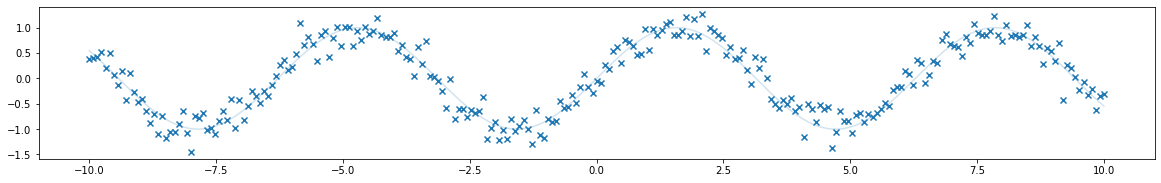

In [3]:
fig = plt.figure(figsize=[20, 20])
ax = fig.gca()
ax.set_aspect('equal')
ax.plot(x, np.sin(x), c="C0", alpha=0.2)
ax.scatter(x, y, c="C0", marker="x")

In [9]:
y_gs = gaussian_filter(y, 4)
assert y.shape == y_gs.shape

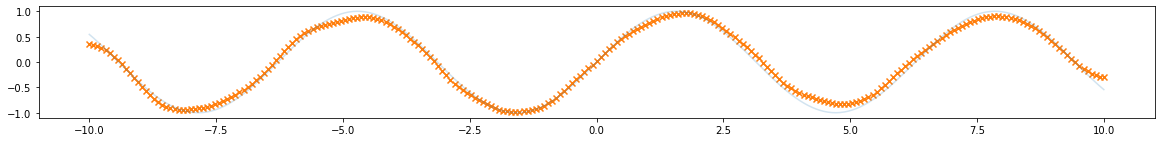

In [10]:
fig = plt.figure(figsize=[20, 20])
ax = fig.gca()
ax.set_aspect('equal')
ax.plot(x, np.sin(x), c="C0", alpha=0.2)
ax.scatter(x, y_gs, c="C1", marker="x")

In [6]:
from scipy.ndimage.filters import minimum_filter1d

In [7]:
y_ms = minimum_filter1d(y, 5)
assert y.shape == y_ms.shape

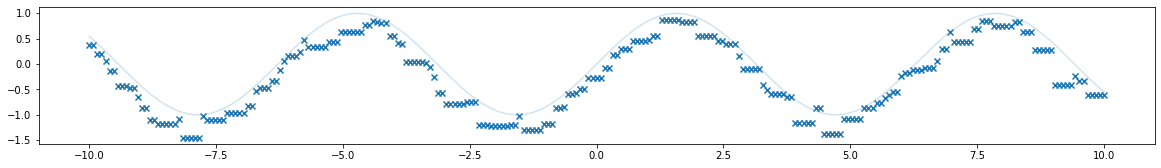

In [8]:
fig = plt.figure(figsize=[20, 20])
ax = fig.gca()
ax.set_aspect('equal')
ax.plot(x, np.sin(x), c="C0", alpha=0.2)
ax.scatter(x, y_ms, c="C0", marker="x")

In [11]:
# Faster than is_pareto_efficient_simple, but less readable.
def is_pareto_efficient(costs, return_mask = True):
    """
    Find the pareto-efficient points
    :param costs: An (n_points, n_costs) array
    :param return_mask: True to return a mask
    :return: An array of indices of pareto-efficient points.
        If return_mask is True, this will be an (n_points, ) boolean array
        Otherwise it will be a (n_efficient_points, ) integer array of indices.
    """
    is_efficient = np.arange(costs.shape[0])
    n_points = costs.shape[0]
    next_point_index = 0  # Next index in the is_efficient array to search for
    while next_point_index<len(costs):
        nondominated_point_mask = np.any(costs<costs[next_point_index], axis=1)
        nondominated_point_mask[next_point_index] = True
        is_efficient = is_efficient[nondominated_point_mask]  # Remove dominated points
        costs = costs[nondominated_point_mask]
        next_point_index = np.sum(nondominated_point_mask[:next_point_index])+1
    if return_mask:
        is_efficient_mask = np.zeros(n_points, dtype = bool)
        is_efficient_mask[is_efficient] = True
        return is_efficient_mask
    else:
        return is_efficient

In [97]:
def Pareto_split(x, return_indices=False):
    if not return_indices:
        x_orig = x.copy()
    assert x.ndim==2
    n_points = x.shape[0]
    is_efficient = np.arange(n_points)
    point_index = 0  # Next index in the is_efficient array to search for
    while point_index<len(x):
        pareto_mask = np.any(x<x[point_index], axis=1)
        pareto_mask[point_index] = True
        is_efficient = is_efficient[pareto_mask]  # Remove dominated points
        x = x[pareto_mask]
        point_index = np.sum(pareto_mask[:point_index])+1
    
    nondominated_mask = np.zeros(n_points, dtype = bool)
    nondominated_mask[is_efficient] = True
    if return_indices:
        return nondominated_mask, np.invert(nondominated_mask)
    else:
        return x_orig[nondominated_mask], x_orig[np.invert(nondominated_mask)] 

In [98]:
x = np.random.randn(100, 6)
x.shape

(100, 6)

In [99]:
ans1 = is_pareto_efficient(x, True) 
ans1

array([ True, False, False, False, False, False,  True,  True,  True,
        True, False, False, False, False,  True,  True, False, False,
        True, False, False,  True,  True, False, False,  True, False,
       False, False, False,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False, False,  True, False,  True,  True, False,
        True,  True,  True, False, False, False,  True,  True,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
       False, False,  True, False, False, False, False, False,  True,
        True, False, False, False,  True, False, False,  True, False,
        True, False,  True,  True,  True,  True, False, False, False,
       False])

In [100]:
a, b  = Pareto_split(x, return_indices=True) 

In [96]:
a.shape

(71, 6)

In [91]:
b.shape

(29, 6)